# Regression: predict RON and Cocking Rate

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.models import load_model
# from tensorflow.keras import layers

# print(tf.__version__)

### Get the data
Import dataset using pandas.

In [62]:
dataset_path = 'Case_study_20190812.csv'
raw_dataset = pd.read_csv(dataset_path)

dataset = raw_dataset.copy()
dataset.head()

,C6Plus_RON,Coke_Laydown_Rate_Rx4,Reformer_WAIT,Feed_Mass_Flow,H2HC_Ratio
0,94.67,15.76,490,170000.0,3.0
1,94.57,13.63,490,170000.0,3.5
2,94.47,11.91,490,170000.0,4.0
3,94.55,15.72,490,172000.0,3.0
4,94.45,13.59,490,172000.0,3.5


### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [63]:
train_dataset = dataset.sample(frac=0.8,random_state=35)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

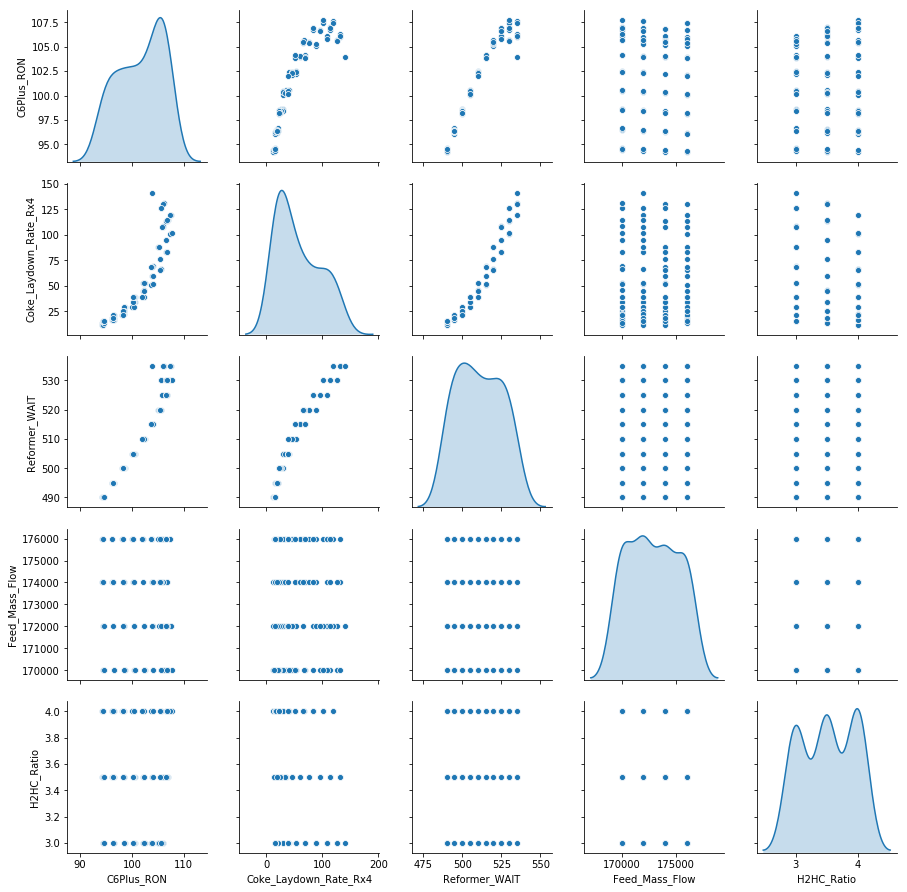

In [64]:
sns.pairplot(train_dataset[['C6Plus_RON','Coke_Laydown_Rate_Rx4', 'Reformer_WAIT','Feed_Mass_Flow','H2HC_Ratio']], diag_kind="kde")
plt.show()

Also look at the overall statistics:

In [66]:
train_stats = train_dataset.describe()
train_stats.pop('C6Plus_RON')
train_stats.pop('Coke_Laydown_Rate_Rx4')
train_stats = train_stats.transpose()
np.array(train_stats[['mean', 'std']])

array([[5.11041667e+02, 1.41591827e+01],
       [1.72916667e+05, 2.24624443e+03],
       [3.52083333e+00, 4.09856629e-01]])

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [8]:
train_dataset.head()

,C6Plus_RON,Coke_Laydown_Rate_Rx4,Reformer_WAIT,Feed_Mass_Flow,H2HC_Ratio
10,94.22,13.52,490,176000.0,3.5
87,106.00,108.00,525,172000.0,3.0
48,102.50,52.71,510,170000.0,3.0
60,104.10,69.13,515,170000.0,3.0
14,96.47,16.19,495,170000.0,4.0


In [9]:
train_labels = train_dataset[['C6Plus_RON']]
test_labels = test_dataset[['C6Plus_RON']]
train_dataset.drop(['C6Plus_RON', 'Coke_Laydown_Rate_Rx4'],  axis = 1, inplace= True)
test_dataset.drop(['C6Plus_RON', 'Coke_Laydown_Rate_Rx4'],  axis = 1, inplace= True)

In [10]:
test_dataset.head()

,Reformer_WAIT,Feed_Mass_Flow,H2HC_Ratio
11,490,176000.0,4.0
15,495,172000.0,3.0
21,495,176000.0,3.0
33,500,176000.0,3.0
44,505,174000.0,4.0


In [108]:
def norm(x):
    stat = np.array([[5.11041667e+02, 1.41591827e+01],
                    [1.72916667e+05, 2.24624443e+03],
                    [3.52083333e+00, 4.09856629e-01]])
    return (x - stat[:,[0]].T) / stat[:,[1]].T
test_dataset.iloc[[11]]

,C6Plus_RON,Coke_Laydown_Rate_Rx4,Reformer_WAIT,Feed_Mass_Flow,H2HC_Ratio
72,105.4,88.2,520,170000.0,3.0


## The model

In [21]:
model = load_model('RON.h5')

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} C6PlusRON".format(mae))

Testing set Mean Abs Error:  0.62 C6PlusRON


### Make predictions

Finally, predict RON values using data in the testing set:

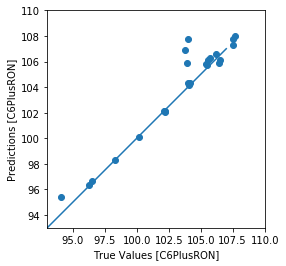

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [C6PlusRON]')
plt.ylabel('Predictions [C6PlusRON]')
plt.axis('equal')
plt.axis('square')
plt.xlim([93,110])
plt.ylim([93,110])
_ = plt.plot([90, 107], [90, 107])
plt.show()


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

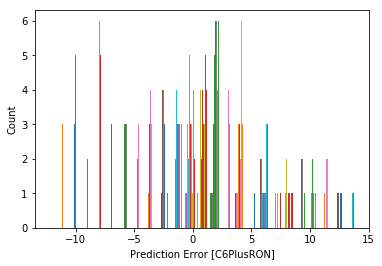

In [25]:
error = test_predictions - np.array(test_labels)

plt.hist(error, bins = 25)

plt.xlabel("Prediction Error [C6PlusRON]")
_ = plt.ylabel("Count")
plt.show()

In [133]:
float(model.predict(norm([520,170000.0,4.0])))

106.14844512939453